In [ ]:
# The following might be needed if the SIFT code does not run. If needed, you will need to restart the runtime
#!pip install opencv-contrib-python==4.5.5.62


#VICO Spring Week 5 Practical: Local features

As usual, let's start with the required imports; we also need to download some of the images we will be working with.

In [ ]:
!wget https://www.dropbox.com/s/ev2zkedv72ivk18/scene1.png
!wget https://www.dropbox.com/s/uy8t276qptvlrdg/scene2.png

import numpy as np
import cv2
import matplotlib.pyplot as plt

--2023-01-19 09:17:32--  https://www.dropbox.com/s/ev2zkedv72ivk18/scene1.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ev2zkedv72ivk18/scene1.png [following]
--2023-01-19 09:17:33--  https://www.dropbox.com/s/raw/ev2zkedv72ivk18/scene1.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaf1db523ba6925a380dab717e7.dl.dropboxusercontent.com/cd/0/inline/B02937mwuj-Cv1T6ON70HIlgh2e0UNqWlEQBGfHBs2R_pRVoCngoDXrRz5jhfA_IOKC93Zll0yLFO42B5HOJfX6x7ouHYYIJPBnzyvwbIquqSJ26OpKiJnz2P92-4LQqR8Hh2DsJDp3jNR24A6xBg0uqrRsZZq_0XxP1E95P0s66Yg/file# [following]
--2023-01-19 09:17:33--  https://ucaf1db523ba6925a380dab717e7.dl.dropboxusercontent.com/cd/0/inline/B02937mwuj-Cv1T6ON70HIlgh2e0UNqWlEQBGfHBs2R_pRVoCngoDXrRz5jhfA_IOKC93Zll0yLFO42B5HOJfX

Let's load the images and visualise them; they are two different views of the same scene.

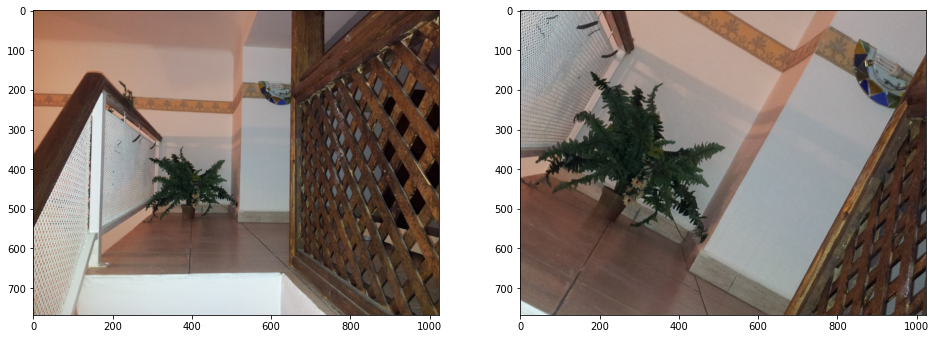

In [ ]:
img1 = cv2.imread("scene1.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("scene2.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(16, 16))
fig.add_subplot(1,2,1)
plt.imshow(img1)
fig.add_subplot(1,2,2)
plt.imshow(img2)

Let's detect the SIFT features, create the descriptors and visualise their locations.

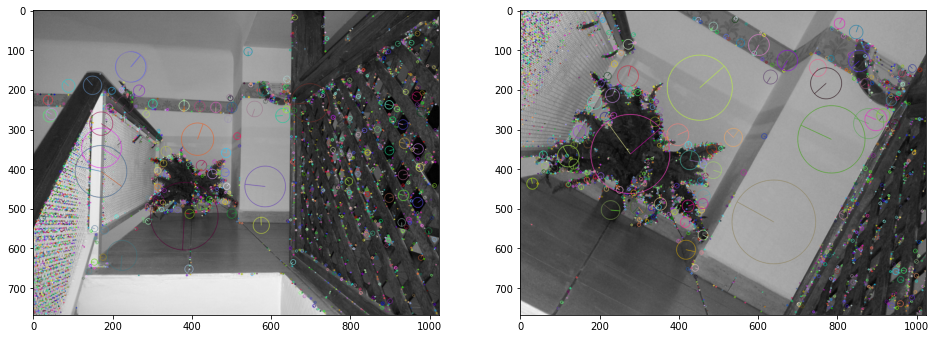

In [ ]:
# We could use colour images to detect the features. However, they might be easier to visualise on greyscale images
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create a SIFT detector and inizialise it with the default parameters. N.B. : the parameter values might differ from the ones suggested in the 2004 paper by Lowe.
sift = cv2.SIFT_create()

# Feature detection
key_points1 = sift.detect(img1_gray,None)
# Feature description
_, descriptors1 = sift.compute(img1_gray, key_points1)
imgOut1 = np.copy(img1_gray)
imgKp1 = cv2.drawKeypoints(img1_gray,key_points1, imgOut1 ,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# We can also do feature detection and description in one step
key_points2, descriptors2 = sift.detectAndCompute(img2_gray,None)
#_, descriptors2 = sift.compute(img2_gray, key_points2)
imgOut2 = np.copy(img2_gray)
imgKp2 = cv2.drawKeypoints(img2_gray,key_points2, imgOut2 ,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig=plt.figure(figsize=(16, 16))
fig.add_subplot(1,2,1)
plt.imshow(imgKp1, cmap = "gray")
fig.add_subplot(1,2,2)
plt.imshow(imgKp2, cmap = "gray")

If you look at the features in the two images, there are a few that are clearly matching on the walls, right above the plant and on the right side: they are in corresponding locations and have the same orientation (with respect to the floor). However, their scale - the radius of the circle representing the feature - is different, since the two images are at different scales.



###Task 1: SIFT features matching

Let's try to match the features. We will create a brute-force matcher and get it to find the the k nearest neighbors.
Once you have found possible matches, try to discard incorrect matches using the criterion defined by Lowe (the threshold *th* is 0.7).
Once you have done this, display all the "correct" matches. Can you spot any clearly wrong match? If there is too much clutter, use multiple images and try to show only a small subset of matches in a given image.


###Task 1 solution

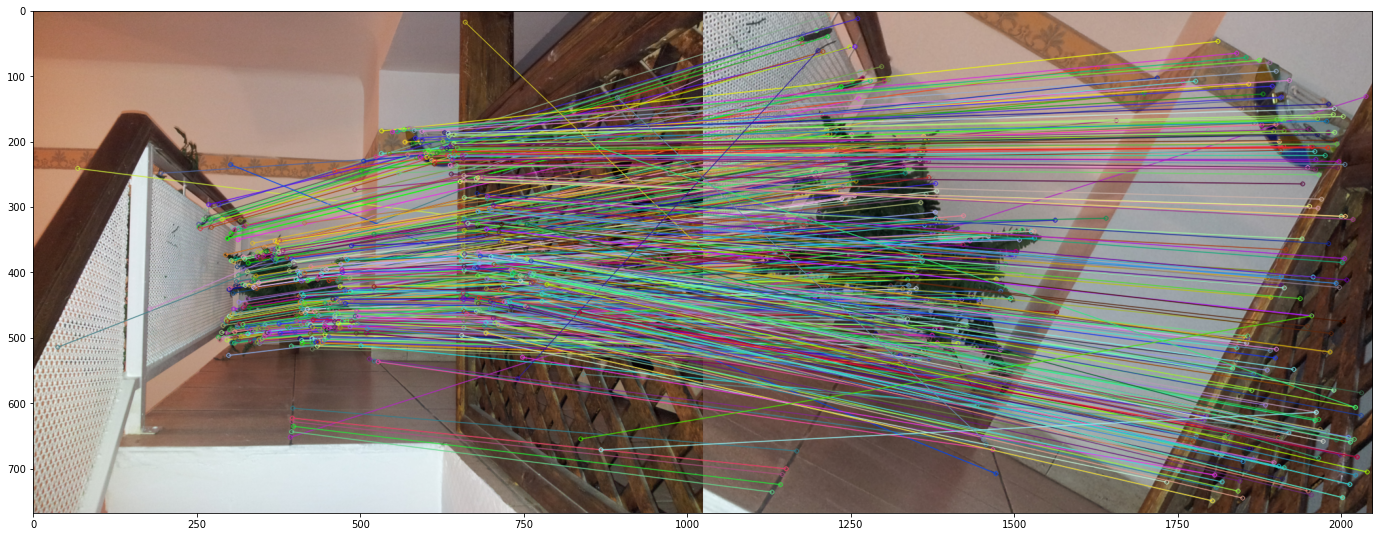

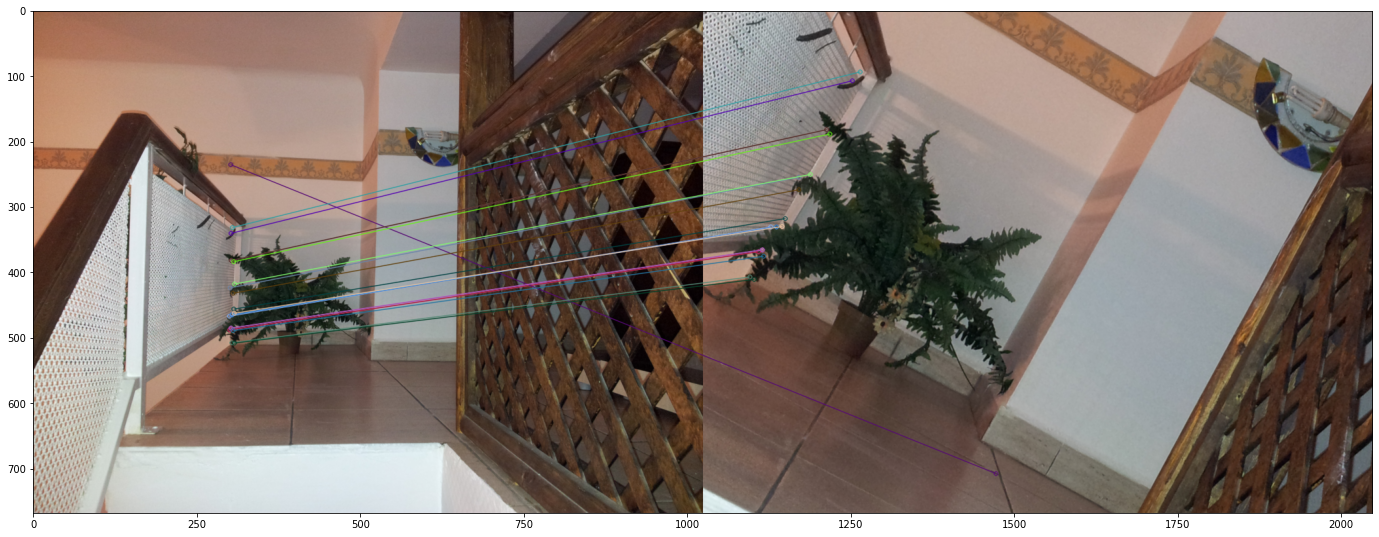

In [ ]:
# BFMatcher with default params
bf = cv2.BFMatcher.create(cv2.NORM_L2, crossCheck = False)
matches = bf.knnMatch(descriptors1,descriptors2, 2)

possiblyCorrectMatches = []
th = 0.7
for m,n in matches:
    if m.distance/n.distance < th:
        possiblyCorrectMatches.append([m])

# Draw the matches and visualise them
img_matched = cv2.drawMatchesKnn(img1,key_points1,img2,key_points2,possiblyCorrectMatches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig=plt.figure(figsize=(24,24))
plt.imshow(img_matched)
plt.show()

# Draw only a small subset set of matches at a time and visualise them
# Your code goes here
img_matched2 = cv2.drawMatchesKnn(img1,key_points1,img2,key_points2,possiblyCorrectMatches[40:61],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig=plt.figure(figsize=(24,24))
plt.imshow(img_matched2)
plt.show()

###Task 2: panoramic stitching using SIFT

Let's go back to stitching images into a panorama (see Week 4 practical). However, this time we will use SIFT features to (hopefully!) locate corresponding point pairs. In particular, we will use all the point for which a "good" match has been found, according to the same criterion used in Task 1.

How do the combined images look like?
You could try again, using *th* = 0.5.


In [ ]:
# Download an image pair
!wget https://www.dropbox.com/s/zd3j502jll2fwwx/scene_panoA.png
!wget https://www.dropbox.com/s/9x990flbwadppg0/scene_panoB.png

--2023-01-19 09:17:58--  https://www.dropbox.com/s/zd3j502jll2fwwx/scene_panoA.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/zd3j502jll2fwwx/scene_panoA.png [following]
--2023-01-19 09:17:59--  https://www.dropbox.com/s/raw/zd3j502jll2fwwx/scene_panoA.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d0b03ed9be9abe1101b888827.dl.dropboxusercontent.com/cd/0/inline/B03qOidpa9qRcCfYoysxmoXIHK78ncclCTCZhltPtG9pHjeEWS9WKWiVaDwDvcSUAUJYjFsHAmSJ26COJj6Vf1QlidE76AbMX6hsGqLFn39E6yhP7FK79RT7pkCFak5p0URRgvzJHoJV4vcZafkLblUJHytrr1mvqcPNedwoKdP-DQ/file# [following]
--2023-01-19 09:17:59--  https://uc7d0b03ed9be9abe1101b888827.dl.dropboxusercontent.com/cd/0/inline/B03qOidpa9qRcCfYoysxmoXIHK78ncclCTCZhltPtG9pHjeEWS9WKWiVaDwDvcSUAUJYjFs

###Task 2 solution

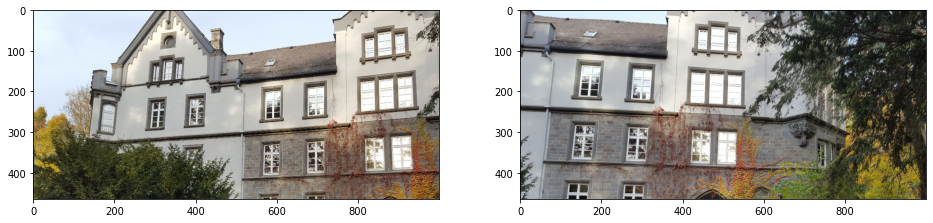

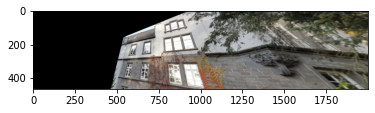

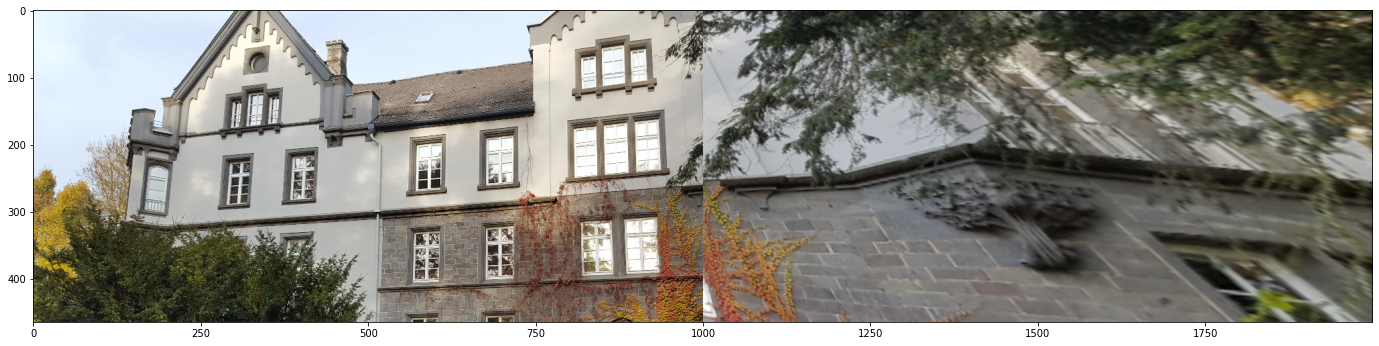

In [ ]:
# Load images
imageA = cv2.cvtColor(cv2.imread('scene_panoA.png'), cv2.COLOR_BGR2RGB)
imageB = cv2.cvtColor(cv2.imread('scene_panoB.png'), cv2.COLOR_BGR2RGB)

# Display original images
fig=plt.figure(figsize=(16, 16))
fig.add_subplot(1,2,1)
plt.imshow(imageA)
fig.add_subplot(1,2,2)
plt.imshow(imageB)
plt.show()

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(imageA,None)
kp2, des2 = sift.detectAndCompute(imageB,None)

th = 0.7

bf = cv2.BFMatcher.create(cv2.NORM_L2, crossCheck = False)
matches = bf.knnMatch(des1,des2, 2)

# Let's check for the "good" matches and store the points
counter = 0
targetpts = np.empty((len(matches),2))
sourcepts = np.empty((len(matches),2))
for i, (m1,m2) in enumerate(matches):
    if m1.distance < th * m2.distance:
        pt1 = kp1[m1.queryIdx].pt
        pt2 = kp2[m1.trainIdx].pt
        targetpts[counter,:] = [pt1[0], pt1[1]]
        sourcepts[counter,:] = [pt2[0], pt2[1]]
        counter = counter + 1

targetpts = targetpts[0:counter,:]
sourcepts = sourcepts[0:counter,:]

# Compute best fit homography, literally the same code as last week
npts = sourcepts.shape[0]
A = np.zeros((2*npts,9))
for i in range(npts):
  A[2*i,:] = [0,0,0,-sourcepts[i,0],-sourcepts[i,1],-1,targetpts[i,1]*sourcepts[i,0],targetpts[i,1]*sourcepts[i,1],targetpts[i,1]]
  A[2*i+1,:] = [sourcepts[i,0],sourcepts[i,1],1,0,0,0,-targetpts[i,0]*sourcepts[i,0],-targetpts[i,0]*sourcepts[i,1],-targetpts[i,0]]
u, s, vh = np.linalg.svd(A)
H = np.array([[vh[8,0],vh[8,1],vh[8,2]],[vh[8,3],vh[8,4],vh[8,5]],[vh[8,6],vh[8,7],vh[8,8]]])

# Warp image B and display result
result = cv2.warpPerspective(imageB, H, (imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
plt.imshow(result)
plt.show()
# Combine with image A and display
result[0:imageA.shape[0], 0:imageA.shape[1]] = imageA
fig=plt.figure(figsize=(24,24))
plt.imshow(result)





###Task 3: RANSAC

Lowering the threshold to 0.5 has worked. However, in this way we have discarded a number of valid matches. Depending on the application, we might be left with not enough points to perform the task.
Instead, we should use RANSAC.
Let's say we have 30% outliers among the matched feature points. What would be a suitable value for the maximum number of RANSAC iterations, if we want p=0.99?

Implement from scratch the basic version of RANSAC seen in the slides and use it on the matched keypoints from the previous example (matching *th* = 0.7) and use it to find outliers and compute the homography.
The main body of the algorithm should require 30 lines of code or less.

Label a point as inlier if the reprojection error is <= 3 pixel.
Given the above, what would be a reasonable value for T?

[[-8.24681711e-05 -8.89722708e-04  9.60963536e-01]
 [-4.79589801e-04  6.28197143e-04  2.76666757e-01]
 [-1.37568657e-06 -1.26668626e-06  1.77925778e-03]]
[[ 1.01559831e-03  5.24957628e-05  9.70172053e-01]
 [-4.54056001e-04  1.68252821e-03  2.42399855e-01]
 [-8.27378847e-07 -7.29459900e-08  2.10406244e-03]]


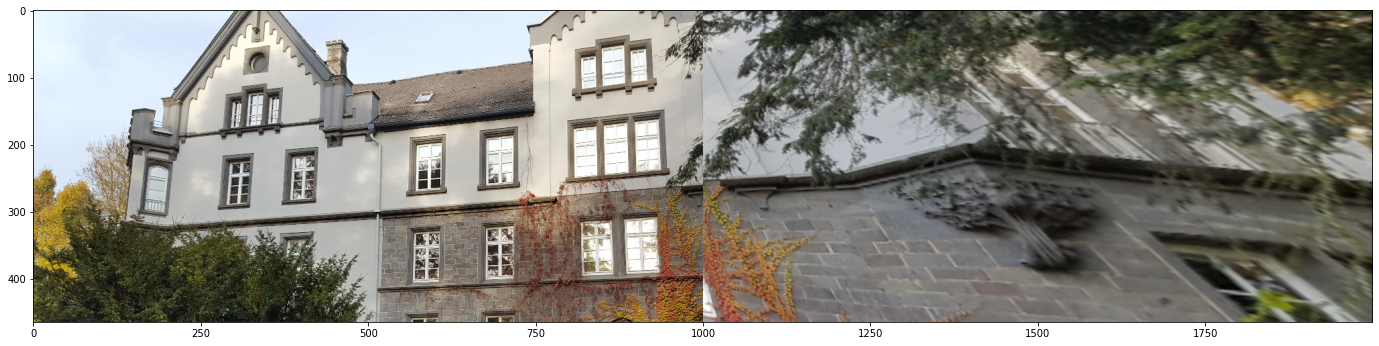

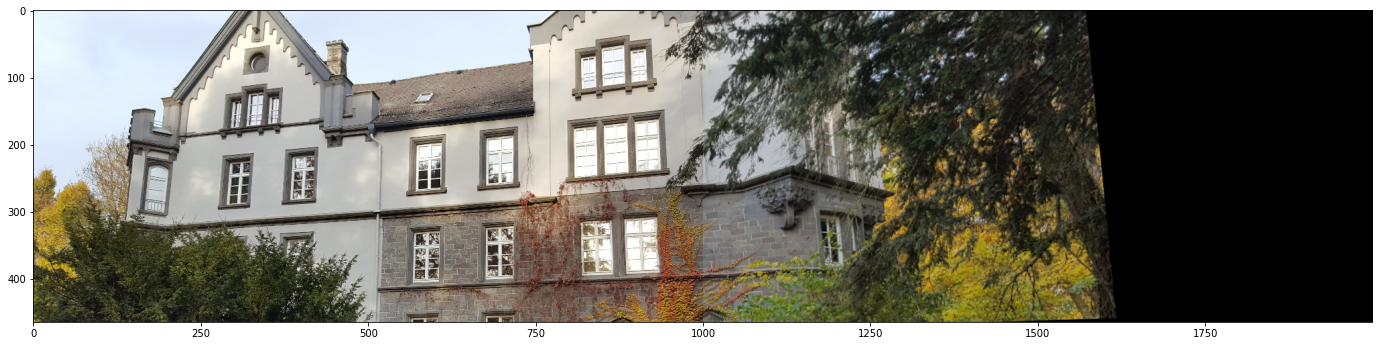

In [ ]:
from numpy import random

po = 0.30
p = 0.99
d = 3
# min number of points to estimate the homography
S = 4

# given that we assume 30% outliers, let's aim at getting at least 60% inliers
T = 0.6
# numer of iterations required
N = int(np.ceil(np.log(1-p)/np.log(1-(1-po)**S)))


tmpTargetpts = np.empty((4,2))
tmpSourcepts = np.empty((4,2))


for iteration in range(N):
  # randomly pick four points
  indeces = [random.randint(npts), random.randint(npts), random.randint(npts), random.randint(npts)]

  for rp in range(S):
    tmpTargetpts[rp,:]=targetpts[indeces[rp],:]
    tmpSourcepts[rp,:]=sourcepts[indeces[rp],:]

  # compute the homography from the 4 random poirnts
  A = np.zeros((2*S,9))
  for pt_ in range(S):
    A[2*pt_,:] = [0,0,0,-tmpSourcepts[pt_,0],-tmpSourcepts[pt_,1],-1,tmpTargetpts[pt_,1]*tmpSourcepts[pt_,0],tmpTargetpts[pt_,1]*tmpSourcepts[pt_,1],tmpTargetpts[pt_,1]]
    A[2*pt_+1,:] = [tmpSourcepts[pt_,0],tmpSourcepts[pt_,1],1,0,0,0,-tmpTargetpts[pt_,0]*tmpSourcepts[pt_,0],-tmpTargetpts[pt_,0]*tmpSourcepts[pt_,1],-tmpTargetpts[pt_,0]]
  u, s, vh = np.linalg.svd(A)
  H_ = np.array([[vh[8,0],vh[8,1],vh[8,2]],[vh[8,3],vh[8,4],vh[8,5]],[vh[8,6],vh[8,7],vh[8,8]]])

  inliers = []

  # project all the points accordind to the homography and compute the error
  for j in range(npts):

    xy = H_ @ np.array([[sourcepts[j,0]],[sourcepts[j,1]],[1]])
    x = xy[0]/xy[2]
    y = xy[1]/xy[2]
    distance = np.sqrt((x-targetpts[j,0])**2 + (y-targetpts[j,1])**2)
    # if the error is smaller than the tolerance, we label the points as 'inlier' according to H
    if distance <= d:
      inliers.append(j)
   # if the current homography leads to enough inliers, we refine the estimate and exit
  if len(inliers) >= (npts*T):
    targetptsIn = targetpts[inliers,:]
    sourceptsIn = sourcepts[inliers,:]

    A = np.zeros((2*len(inliers),9))
    for i in range(len(inliers)):
      A[2*i,:] = [0,0,0,-sourceptsIn[i,0],-sourceptsIn[i,1],-1,targetptsIn[i,1]*sourceptsIn[i,0],targetptsIn[i,1]*sourceptsIn[i,1],targetptsIn[i,1]]
      A[2*i+1,:] = [sourceptsIn[i,0],sourceptsIn[i,1],1,0,0,0,-targetptsIn[i,0]*sourceptsIn[i,0],-targetptsIn[i,0]*sourceptsIn[i,1],-targetptsIn[i,0]]
    u, s, vh = np.linalg.svd(A)
    H_final = np.array([[vh[8,0],vh[8,1],vh[8,2]],[vh[8,3],vh[8,4],vh[8,5]],[vh[8,6],vh[8,7],vh[8,8]]])
    break


print(H)
print(H_final)
fig=plt.figure(figsize=(24,24))
resultOld = cv2.warpPerspective(imageB, H, (imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
resultOld[0:imageA.shape[0], 0:imageA.shape[1]] = imageA
plt.imshow(resultOld)
plt.show()
fig=plt.figure(figsize=(24,24))
resultRANSAC = cv2.warpPerspective(imageB, H_final, (imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
resultRANSAC[0:imageA.shape[0], 0:imageA.shape[1]] = imageA
plt.imshow(resultRANSAC)
plt.show()


###Task 4: DoG Scale-space

Load the image and build the first octave (s = 2, $\sigma = \sqrt(2)/2$); compute and display the Difference of Gaussian images.
Before processing the image, convert it into grayscale and normalise it.
You can blur the image using the function `cv2.GaussianBlur`.






--2022-02-11 10:41:52--  https://www.dropbox.com/s/p8rpfe2qr7hw1tj/man.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/p8rpfe2qr7hw1tj/man.png [following]
--2022-02-11 10:41:52--  https://www.dropbox.com/s/raw/p8rpfe2qr7hw1tj/man.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5a1dce006a6b793aa631b4f6cc.dl.dropboxusercontent.com/cd/0/inline/BfiK4vTzAqAj0MV_LhtMjxXhMRL1MkXgRv83FH5HHZ6wRDfDsxS0BaSEyYATL9sF9eil7AMJBJFNhpnwAU_aWGyin7oMCMPXTaQT4zsFVcBKd6g3g9H2DLHlCrusCW5sM6xRohSGjdD_fkmPVwxB25Y0/file# [following]
--2022-02-11 10:41:52--  https://uc5a1dce006a6b793aa631b4f6cc.dl.dropboxusercontent.com/cd/0/inline/BfiK4vTzAqAj0MV_LhtMjxXhMRL1MkXgRv83FH5HHZ6wRDfDsxS0BaSEyYATL9sF9eil7AMJBJFNhpnwAU_aWGyin7oMCMPXTaQT4zsFV

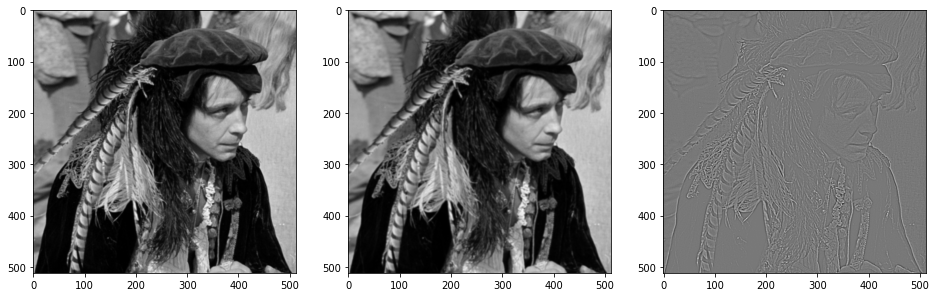

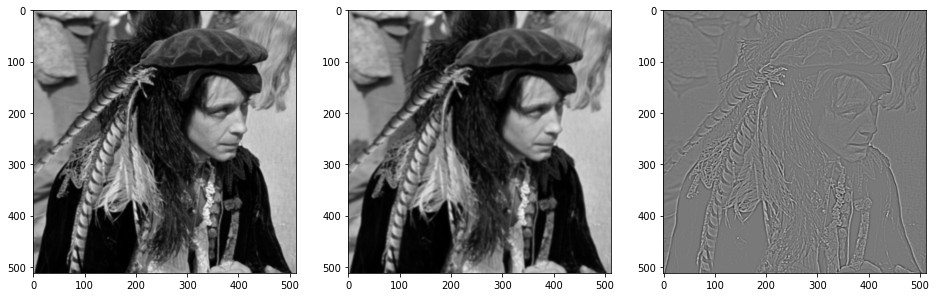

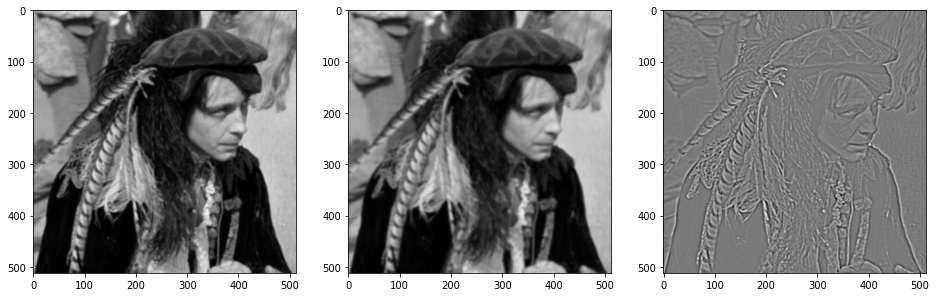

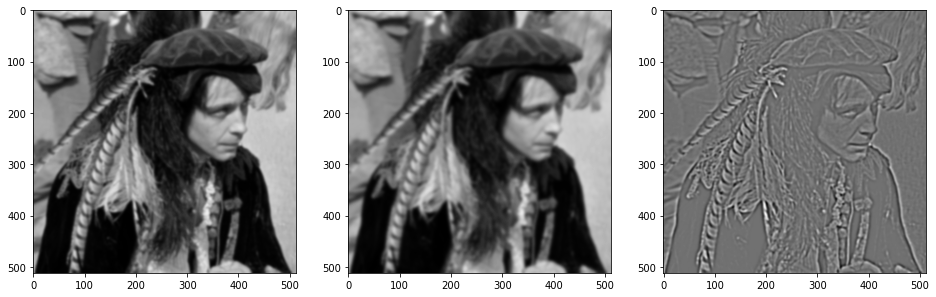

In [ ]:
!wget https://www.dropbox.com/s/p8rpfe2qr7hw1tj/man.png


img1 = cv2.imread("man.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY).astype('float32')/255

sigma = np.sqrt(2)/2
num_intervals = 2

# from the slides
num_images_per_octave = num_intervals + 3
k = 2 ** (1. / num_intervals)
gaussian_kernels = np.empty(num_images_per_octave)

gaussian_kernels[0] = sigma

# define the amount of blurring for the images in the octave
for image_ind in range(1, num_images_per_octave):
  gaussian_kernels[image_ind] = k * gaussian_kernels[image_ind-1]

# compute the difference of gaussians. This code is inefficient, since it recomputes some blurred images twice
for i in range(len(gaussian_kernels)-1):
   gaussian_kernel = gaussian_kernels[i]
   imgf1 = cv2.GaussianBlur(img1, (0, 0), sigmaX=gaussian_kernel, sigmaY=gaussian_kernel)
   gaussian_kernel = gaussian_kernels[i+1]
   imgf2 = cv2.GaussianBlur(img1, (0, 0), sigmaX=gaussian_kernel, sigmaY=gaussian_kernel)
   DoG = imgf1-imgf2
   fig=plt.figure(figsize=(16, 16))
   fig.add_subplot(1,3,1)
   plt.imshow(imgf1,cmap='gray')
   fig.add_subplot(1,3,2)
   plt.imshow(imgf2,cmap='gray')
   fig.add_subplot(1,3,3)
   plt.imshow(DoG,cmap='gray')

